In [ ]:
#default_exp mabe

# Augmenting Animals

> Data augmentation on the problem from yesterday [Multi-Agent BEhaviour Challenge](https://www.aicrowd.com/challenges/multi-agent-behavior-representation-modeling-measurement-and-applications)

The challenge asks you to classify motion of mice when presented with another mouse. We are given a set of keypoints for each mouse for each frame (as well as an associated label for the type of behaviour). I want to draw these mice with 'trails' to show the motion path and capture many frames worth of data in one image.

This didn't turn out particularly useful in the actual competition but it was a fun diversion :)

In [ ]:
#hide
from days_of_code.core import *
from days_of_code.mabe import *
import numpy as np
import cairocffi as cairo
from PIL import Image

I am working with a small sample of the data saved with numpy.

In [ ]:
sequence = np.load('data/MABe/example_sequence.npy')

FOr each frame (30fps video) the positions of keypoints on the mouse (nose, ears, neck, sides and tail) have been annotated. There is also a label for the behaviour happening at each time instant.

In [ ]:
sequence[0] # Two mice, list of X and list of Y for each for one frame

array([[[298.99367828, 266.99367828, 248.99367828, 243.99367828,
         181.99367828, 144.99367828, 125.99367828],
        [140.75094149, 194.75094149, 138.75094149, 169.75094149,
         240.75094149, 167.75094149, 241.75094149]],

       [[191.68942719, 226.68942719, 167.68942719, 200.68942719,
         235.68942719, 161.68942719, 203.68942719],
        [283.87298664, 323.87298664, 329.87298664, 342.87298664,
         429.87298664, 433.87298664, 487.87298664]]])

In [ ]:
imw, imh = 1024, 570 # The image dimensions in which the mice move about

In [ ]:
#export
import random
def augment_sequence(seq):
    """ Flip / rotate a sequence with some random variations"""
    imw, imh = 1024, 570
    if random.random()>0.5:
        for frame in range(len(seq)):
            for m in [0, 1]:
                seq[frame][m][0] = imw-seq[frame][m][0] # X flip
    if random.random()>0.5:
        for frame in range(len(seq)):
            for m in [0, 1]:
                seq[frame][m][1] = imh-seq[frame][m][1] # X flip
                    
    if random.random()>0.7:
        angle = (np.random.rand()-0.5) * (np.pi * 2)
        c, s = np.cos(angle), np.sin(angle)
        rot = np.array([[c, -s], [s, c]])
        for frame in range(len(seq)):
            for m in [0, 1]:
                seq[frame][m] -= np.array([[imw/2]*7, [imh/2]*7])
                seq[frame][m] = np.dot(np.array(seq[frame][m]).T, rot).T
                seq[frame][m] += np.array([[imw/2]*7, [imh/2]*7])
                    
    
    return seq

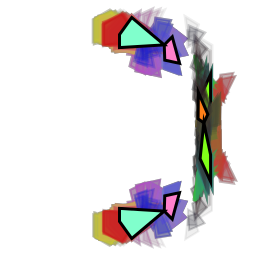

In [ ]:
sequence = np.load('data/MABe/example_sequence.npy')
surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, 256, 256) # Create the surface
ctx = cairo.Context(surface)
draw_instant(ctx, sequence, 256, 256, 200, n=80, step=5) # Original
draw_instant(ctx, augment_sequence(sequence), 256, 256, 200, n=80, step=5) # Overlay the augmented version
display_surface(surface)

I fed a few thousand of these images (varous augmentations but NOT overlaid like the above) to a resnet and trained it for a bit, but couldn't get more than ~66% accuracy so I gave up. The competition took the bulk of my coding time today so this is a short notebook. See you tomorrow.